<img src="res/logo/coolpi.png" width="200">

# Notebook

# RGB-to-XYZ Transform Matrix Computation - Model Regression

# Nikon D5600 & Nikon Z7II Data 

## Import packages 

In [1]:
import sys
sys.version

'3.9.16 (main, May 15 2023, 23:46:34) \n[GCC 11.2.0]'

In [2]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

## SPD Illuminant

In [3]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

### Laboratory conditions: JN Colour Cabin

JN-D65

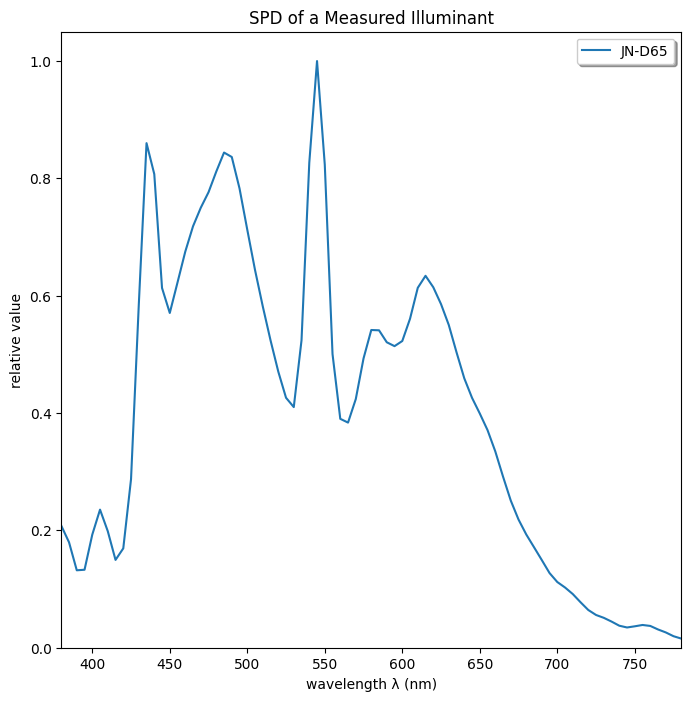

In [4]:
file_spd = ["res", "spd", "SPD_JND65_014_02°_6658K.csv"]
path_spd = os.path.join(*file_spd)

JND65 = MeasuredIlluminant(illuminant_name="JN-D65", path_file=path_spd)
JND65.normalise_lambda_values()
JND65.plot()

JN-A

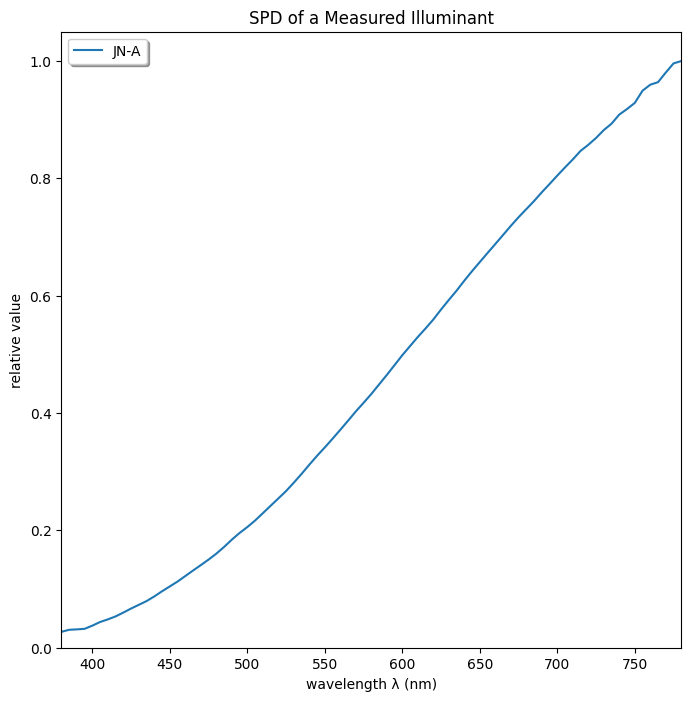

In [5]:
file_spd = ["res", "spd", "SPD_JNA_015_02°_2681K.csv"]
path_spd = os.path.join(*file_spd)

JNA = MeasuredIlluminant(illuminant_name="JN-A", path_file=path_spd)
JNA.normalise_lambda_values()
JNA.plot()

JN-F

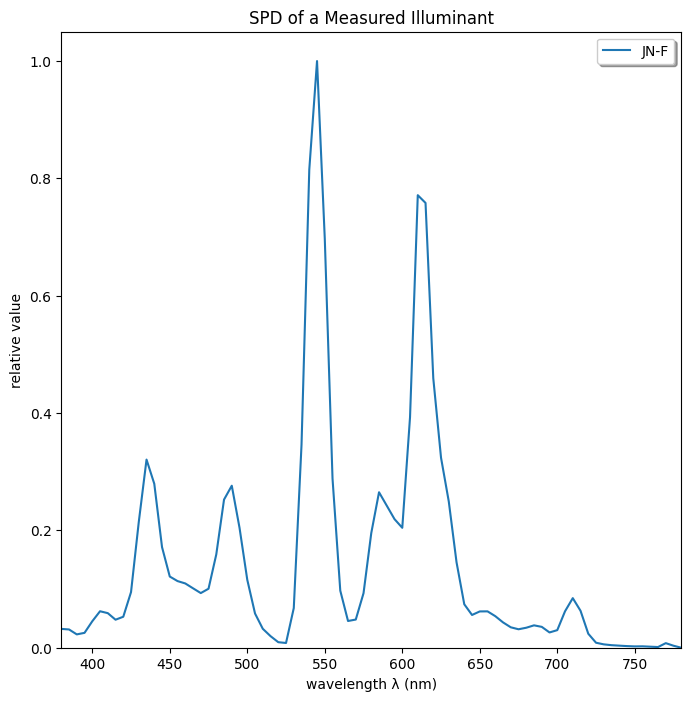

In [6]:
file_spd = ["res", "spd", "SPD_JNF_016_02°_3872K.csv"]
path_spd = os.path.join(*file_spd)

JNF = MeasuredIlluminant(illuminant_name="JN-F", path_file=path_spd)
JNF.normalise_lambda_values()
JNF.plot()

JN-D50

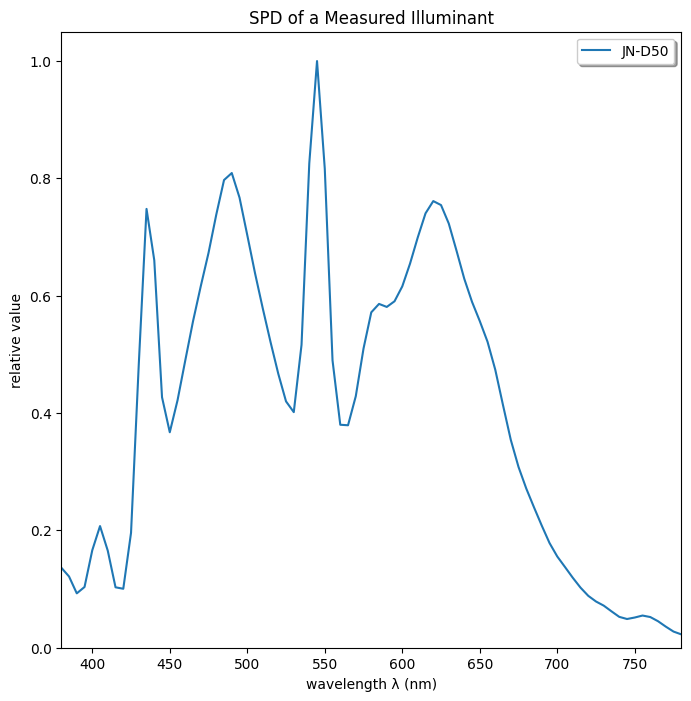

In [7]:
file_spd = ["res", "spd", "SPD_JND50_017_02°_4963K.csv"]
path_spd = os.path.join(*file_spd)

JND50 = MeasuredIlluminant(illuminant_name="JN-D50", path_file=path_spd)
JND50.normalise_lambda_values()
JND50.plot()

### In situ:

IN-29

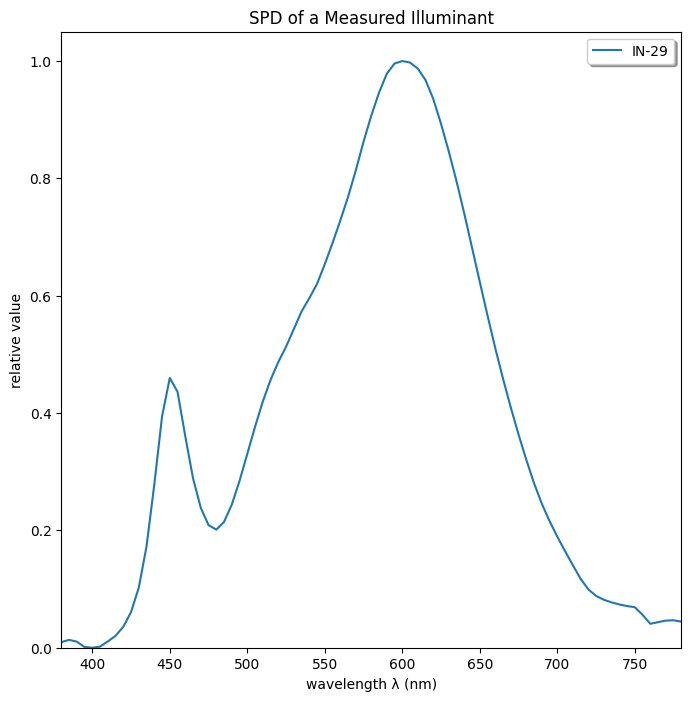

In [8]:
file_spd = ["res", "spd", "INDIGO-C7000-A_029_02°_3066K.csv"]
path_spd = os.path.join(*file_spd)

IN29 = MeasuredIlluminant(illuminant_name="IN-29", path_file=path_spd)
IN29.normalise_lambda_values()
IN29.plot()

IN-30

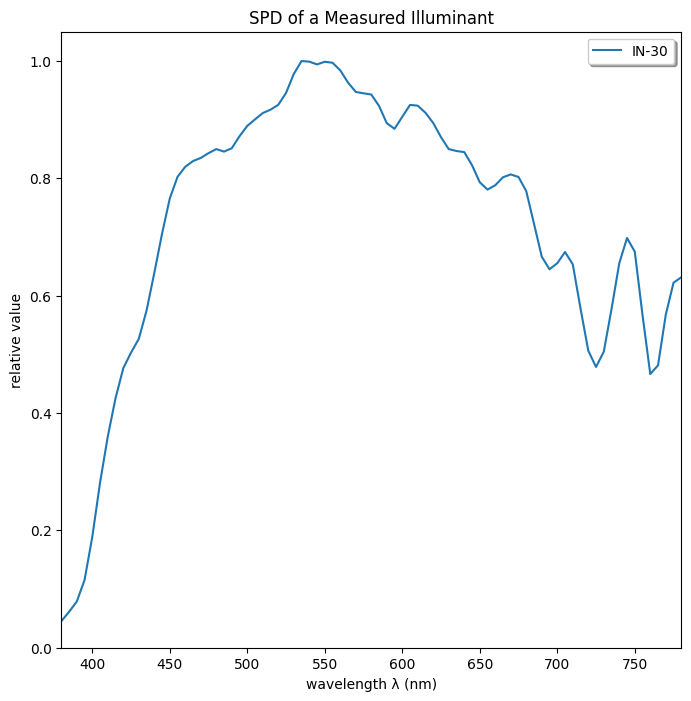

In [9]:
file_spd = ["res", "spd", "INDIGO-C7000-A_030_02°_5027K.csv"]
path_spd = os.path.join(*file_spd)

IN30 = MeasuredIlluminant(illuminant_name="IN-30", path_file=path_spd)
IN30.normalise_lambda_values()
IN30.plot()

### Outdoor

OUT-38

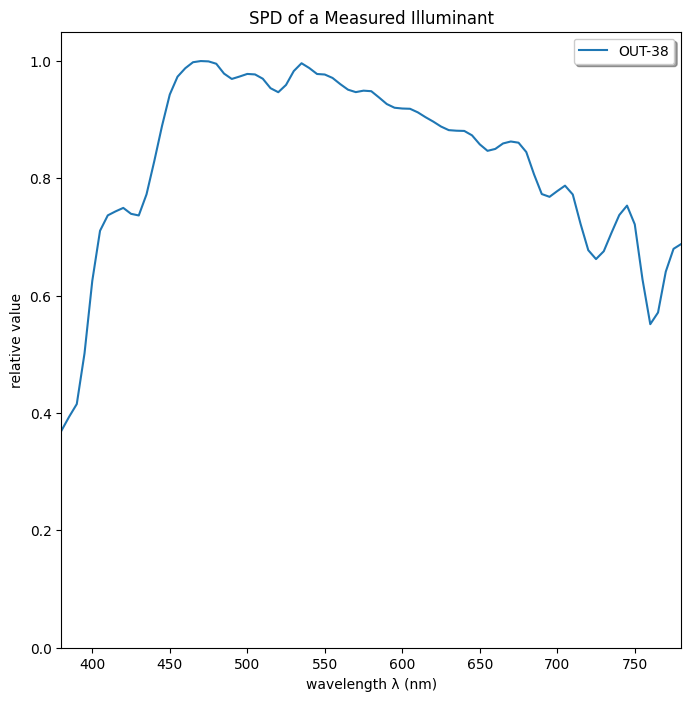

In [10]:
file_spd = ["res", "spd", "INDIGO-C7000-A_038_02°_5557K.csv"]
path_spd = os.path.join(*file_spd)

OUT38 = MeasuredIlluminant(illuminant_name="OUT-38", path_file=path_spd)
OUT38.normalise_lambda_values()
OUT38.plot()

## Load Data From CSV

## Nikon D5600

### ND-ODS

In [ ]:
path_csv = os.path.join("res", "csv", "ND_ODS.csv")

data_from_csv = pd.read_csv(path_csv, sep=";")

data_nd_ods = pd.DataFrame(data_from_csv, columns=["ColourChecker","patch_id", "illuminant", "X", "Y", "Z", "R", "G", "B"])
data_nd_ods

Replace `str` for `MeasuredIlluminant`

In [ ]:
data_nd_ods["illuminant"].replace({"JN-D65": JND65, "JN-A": JNA, "JN-F": JNF, "JN-D50": JND50, "IN-29": IN29, "IN-30": IN30, "OUT-38": OUT38}, inplace=True)
data_nd_ods

In [ ]:
data_nd_ods.describe()

### ND-WPPDS

In [11]:
path_csv = os.path.join("res", "csv", "ND_WPPDS.csv")

data_from_csv = pd.read_csv(path_csv, sep=";")

data_nd_wppds = pd.DataFrame(data_from_csv, columns=["ColourChecker","patch_id", "illuminant", "X", "Y", "Z", "R", "G", "B"])
data_nd_wppds

,ColourChecker,patch_id,illuminant,X,Y,Z,R,G,B
0,CCDSG,B2,JN-D65,0.192153,0.118824,0.161651,0.216193,0.069274,0.114293
1,CCDSG,B3,JN-D65,0.450698,0.362052,0.523813,0.475808,0.356195,0.483228
2,CCDSG,B4,JN-D65,0.177136,0.107950,0.287000,0.139864,0.079860,0.194506
3,CCDSG,B5,JN-D65,0.233731,0.246097,0.625016,0.132133,0.312600,0.540624
4,CCDSG,B6,JN-D65,0.292570,0.360806,0.590597,0.191518,0.401339,0.526220
...,...,...,...,...,...,...,...,...,...
1339,SCK100,H2,OUT-38,0.290914,0.265909,0.470194,0.270734,0.291643,0.421789
1340,SCK100,H3,OUT-38,0.121935,0.145765,0.075621,0.109741,0.128754,0.074531
1341,SCK100,H4,OUT-38,0.203656,0.210562,0.365814,0.167194,0.235780,0.322926
1342,SCK100,H5,OUT-38,0.444042,0.388328,0.265094,0.525529,0.335110,0.274865


Replace `str` for `MeasuredIlluminant`

In [12]:
data_nd_wppds["illuminant"].replace({"JN-D65": JND65, "JN-A": JNA, "JN-F": JNF, "JN-D50": JND50, "IN-29": IN29, "IN-30": IN30, "OUT-38": OUT38}, inplace=True)
data_nd_wppds

,ColourChecker,patch_id,illuminant,X,Y,Z,R,G,B
0,CCDSG,B2,MeasuredIlluminant object: Illuminant JN-D65.,0.192153,0.118824,0.161651,0.216193,0.069274,0.114293
1,CCDSG,B3,MeasuredIlluminant object: Illuminant JN-D65.,0.450698,0.362052,0.523813,0.475808,0.356195,0.483228
2,CCDSG,B4,MeasuredIlluminant object: Illuminant JN-D65.,0.177136,0.107950,0.287000,0.139864,0.079860,0.194506
3,CCDSG,B5,MeasuredIlluminant object: Illuminant JN-D65.,0.233731,0.246097,0.625016,0.132133,0.312600,0.540624
4,CCDSG,B6,MeasuredIlluminant object: Illuminant JN-D65.,0.292570,0.360806,0.590597,0.191518,0.401339,0.526220
...,...,...,...,...,...,...,...,...,...
1339,SCK100,H2,MeasuredIlluminant object: Illuminant OUT-38.,0.290914,0.265909,0.470194,0.270734,0.291643,0.421789
1340,SCK100,H3,MeasuredIlluminant object: Illuminant OUT-38.,0.121935,0.145765,0.075621,0.109741,0.128754,0.074531
1341,SCK100,H4,MeasuredIlluminant object: Illuminant OUT-38.,0.203656,0.210562,0.365814,0.167194,0.235780,0.322926
1342,SCK100,H5,MeasuredIlluminant object: Illuminant OUT-38.,0.444042,0.388328,0.265094,0.525529,0.335110,0.274865


In [13]:
data_nd_wppds.describe()

,X,Y,Z,R,G,B
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,0.354156,0.338763,0.289111,0.353127,0.305802,0.280012
std,0.236544,0.231818,0.236787,0.259319,0.233741,0.236200
min,0.036799,0.036920,0.038539,0.011645,0.010658,0.011158
25%,0.151088,0.149805,0.095345,0.126388,0.112272,0.100271
50%,0.318703,0.284988,0.221718,0.302829,0.263269,0.206047
75%,0.490642,0.476324,0.423660,0.535215,0.419438,0.394228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Nikon Z7II 

### NZ-WPPDS

In [ ]:
path_csv = os.path.join("res", "csv", "NZ_WPPDS.csv")

data_from_csv = pd.read_csv(path_csv, sep=";")

data_nz_wppds = pd.DataFrame(data_from_csv, columns=["ColourChecker","patch_id", "illuminant", "X", "Y", "Z", "R", "G", "B"])
data_nz_wppds

Replace `str` for `MeasuredIlluminant`

In [ ]:
data_nz_wppds["illuminant"].replace({"IN-29": IN29, "IN-30": IN30, "OUT-38": OUT38 }, inplace=True)
data_nz_wppds

# Regression Model

## Select Dataset

Please, first select camera

NikonD5600

In [ ]:
data_set = data_nd_ods

In [14]:
data_set = data_nd_wppds

Nikon Z7II 

In [ ]:
data_set = data_nz_wppds

## One illuminant and One colourchecker

Select illuminant and ColourChecker

In [ ]:
spd = JND65
colour_checker = "XRCCPP"

In [ ]:
data = data_set[(data_set['illuminant'] == spd)&(data_set['ColourChecker'] == colour_checker)]

One illuminant and all colour checkers

In [ ]:
data = data_set[(data_set['illuminant'] == spd) & ((data_set['ColourChecker'] == "CCDSG") | (data_set['ColourChecker'] == "CCC") | (data_set['ColourChecker'] == "XRCCPP") | (data_set['ColourChecker'] == "SCK100"))]

## Multiple options

Multiple illuminants & 1 colour_checker

All JN (Lab.)

In [ ]:
data = data_set[((data_set['illuminant'] == JND65) | (data_set['illuminant'] == JNA) | (data_set['illuminant'] == JNF) | (data_set['illuminant'] == JND50)) &(data_set['ColourChecker'] == colour_checker)]

ALL In situ

In [ ]:
data = data_set[((data_set['illuminant'] == SPD29) | (data_set['illuminant'] == SPD30) | (data_set['illuminant'] == SPD38)) &(data_set['ColourChecker'] == colour_checker)]

All

In [ ]:
data = data_set[((data_set['illuminant'] == JND65) | (data_set['illuminant'] == JNA) | (data_set['illuminant'] == JNF) | (data_set['illuminant'] == JND50) | (data_set['illuminant'] == SPD29) | (data_set['illuminant'] == SPD30) | (data_set['illuminant'] == SPD38)) & (data_set['ColourChecker'] == colour_checker)]

One Illuminant & All colourchechers

In [ ]:
spd = JND65

In [ ]:
data = data_set[(data_set['illuminant'] == spd)]

All Illuminants & All colourchechers

All JN (Lab.) & All colourcheckers

In [ ]:
data = data_set[((data_set['illuminant'] == JND65) | (data_set['illuminant'] == JNA) | (data_set['illuminant'] == JNF) | (data_set['illuminant'] == JND50))]


All In situ & All colourchecers

In [ ]:
data = data_set[((data_set['illuminant'] == IN29) | (data_set['illuminant'] == IN30) | (data_set['illuminant'] == OUT38))]


All data

In [15]:
data = data_set

# Data Model

In [16]:
data

,ColourChecker,patch_id,illuminant,X,Y,Z,R,G,B
0,CCDSG,B2,MeasuredIlluminant object: Illuminant JN-D65.,0.192153,0.118824,0.161651,0.216193,0.069274,0.114293
1,CCDSG,B3,MeasuredIlluminant object: Illuminant JN-D65.,0.450698,0.362052,0.523813,0.475808,0.356195,0.483228
2,CCDSG,B4,MeasuredIlluminant object: Illuminant JN-D65.,0.177136,0.107950,0.287000,0.139864,0.079860,0.194506
3,CCDSG,B5,MeasuredIlluminant object: Illuminant JN-D65.,0.233731,0.246097,0.625016,0.132133,0.312600,0.540624
4,CCDSG,B6,MeasuredIlluminant object: Illuminant JN-D65.,0.292570,0.360806,0.590597,0.191518,0.401339,0.526220
...,...,...,...,...,...,...,...,...,...
1339,SCK100,H2,MeasuredIlluminant object: Illuminant OUT-38.,0.290914,0.265909,0.470194,0.270734,0.291643,0.421789
1340,SCK100,H3,MeasuredIlluminant object: Illuminant OUT-38.,0.121935,0.145765,0.075621,0.109741,0.128754,0.074531
1341,SCK100,H4,MeasuredIlluminant object: Illuminant OUT-38.,0.203656,0.210562,0.365814,0.167194,0.235780,0.322926
1342,SCK100,H5,MeasuredIlluminant object: Illuminant OUT-38.,0.444042,0.388328,0.265094,0.525529,0.335110,0.274865


In [17]:
data.describe()

,X,Y,Z,R,G,B
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,0.354156,0.338763,0.289111,0.353127,0.305802,0.280012
std,0.236544,0.231818,0.236787,0.259319,0.233741,0.236200
min,0.036799,0.036920,0.038539,0.011645,0.010658,0.011158
25%,0.151088,0.149805,0.095345,0.126388,0.112272,0.100271
50%,0.318703,0.284988,0.221718,0.302829,0.263269,0.206047
75%,0.490642,0.476324,0.423660,0.535215,0.419438,0.394228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split training/test

In [18]:
from sklearn.model_selection import train_test_split

For model assessment

In [19]:
X = np.array([data.patch_id, data.illuminant, data.R, data.G, data.B]).T
y = np.array([data.patch_id, data.illuminant, data.X, data.Y, data.Z]).T

print(X.shape)
print(y.shape)

(1344, 5)
(1344, 5)


Split data

In [20]:
X_train_illum, X_test_illum, y_train_illum, y_test_illum = train_test_split(X, y, test_size = 0.2, random_state=4)

Training / test

In [21]:
X_train = X_train_illum[:,2:5]   # R G B
y_train = y_train_illum[:,2:5]   # X Y Z 

X_test = X_test_illum[:,2:5]
y_test = y_test_illum[:,2:5]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1075, 3)
(1075, 3)
(269, 3)
(269, 3)


## Linear Regression Model Comparison

- OLS
- MTLCV
- BR
- HR
- TSR

In [22]:
from sklearn.linear_model import LinearRegression, MultiTaskLassoCV

LinearRegression: Ordinary Least Squares (OLS). The least square regression determines the coefficients of the model so that the sum of the squared residuals is minimum. 

Linear Regression Without intercept (bias)

In [23]:
linear_model = LinearRegression(fit_intercept=False,copy_X=True, n_jobs=None, positive=False) # same as NLSO

MTLCV

In [ ]:
linear_model = MultiTaskLassoCV(fit_intercept=False, cv=10, random_state=1, selection ="cyclic")

Model Fit

In [24]:
linear_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [25]:
linear_model.coef_

array([[ 0.75241568,  0.23427715,  0.01799619],
       [ 0.30399567,  0.86361945, -0.16067053],
       [ 0.09668603, -0.35272384,  1.25815143]])

In [26]:
y_pred = linear_model.predict(X_test)

Each channel separately

In [ ]:
from sklearn.linear_model import BayesianRidge, HuberRegressor, TheilSenRegressor

In [ ]:
from sklearn import metrics

BR - BayesianRidge

In [ ]:
linear_model = BayesianRidge(fit_intercept=False) # default parameters

Robustness regresion



In [ ]:
linear_model = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=False, tol=1e-05)

TheilSenRegressor: The TheilSenRegressor estimator uses a generalization of the median in multiple dimensions. It is thus robust to multivariate outliers. Note however that the robustness of the estimator decreases quickly with the dimensionality of the problem. It loses its robustness properties and becomes no better than an ordinary least squares in high dimension. TheilSenRegressor is comparable to the Ordinary Least Squares (OLS) in terms of asymptotic efficiency and as an unbiased estimator. In contrast to OLS, Theil-Sen is a non-parametric method which means it makes no assumption about the underlying distribution of the data. Since Theil-Sen is a median-based estimator, it is more robust against corrupted data aka outliers. In univariate setting, Theil-Sen has a breakdown point of about 29.3% in case of a simple linear regression which means that it can tolerate arbitrary corrupted data of up to 29.3%.

In [ ]:
linear_model = TheilSenRegressor(fit_intercept=False, copy_X=True, max_subpopulation=10000.0, n_subsamples=None, max_iter=1000, tol=0.0001, random_state=1, n_jobs=None, verbose=False )

Each channel separately

In [ ]:
linear_model.fit(X_train, y_train[:,0]) # RGB to X

print(linear_model.coef_) # X

y_pred_X = linear_model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test[:,0], y_pred_X)
MSE = metrics.mean_squared_error(y_test[:,0], y_pred_X)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test[:,0], y_pred_X)
print('Mean Absolute Error     :', MAE)
print('Mean Squared Error      :', MSE)
print('Root Mean Squared Error :', RMSE)
print('R2                      :', R2)

In [ ]:
linear_model.fit(X_train, y_train[:,1]) # RGB to Y

print(linear_model.coef_) # Y

y_pred_Y = linear_model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test[:,1], y_pred_Y)
MSE = metrics.mean_squared_error(y_test[:,1], y_pred_Y)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test[:,1], y_pred_Y)
print('Mean Absolute Error     :', MAE)
print('Mean Squared Error      :', MSE)
print('Root Mean Squared Error :', RMSE)
print('R2                      :', R2)

In [ ]:
linear_model.fit(X_train, y_train[:,2]) # RGB to Z

print(linear_model.coef_) # X

y_pred_Z = linear_model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test[:,2], y_pred_Z)
MSE = metrics.mean_squared_error(y_test[:,2], y_pred_Z)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test[:,2], y_pred_Z)
print('Mean Absolute Error     :', MAE)
print('Mean Squared Error      :', MSE)
print('Root Mean Squared Error :', RMSE)
print('R2                      :', R2)

In [ ]:
y_pred = np.zeros((X_test.shape[0], X_test.shape[1]))
y_pred[:,0] = y_pred_X
y_pred[:,1] = y_pred_Y
y_pred[:,2] = y_pred_Z

## Create a dataframe for model assesment

patch_id  illuminant   X  Y  X  X' Y' Z'     X(D65) Y(D65) Z(D65) X'(D65) Y'(D65) Z'(D65)  L a b   L' a' b'   DeltaE CIEDE2000

In [27]:
data_for_model = y_test_illum # test / training

In [28]:
dataframe_assesment_model = pd.DataFrame(data_for_model, columns= ["patch_id", "illuminant_x", "X", "Y", "Z"])
dataframe_assesment_model.rename(columns = {'illuminant_x':'illuminant'}, inplace = True) # rename column
# add predicted values
dataframe_assesment_model["X"] = dataframe_assesment_model["X"]*100
dataframe_assesment_model["Y"] = dataframe_assesment_model["Y"]*100
dataframe_assesment_model["Z"] = dataframe_assesment_model["Z"]*100
dataframe_assesment_model["X'"] = y_pred[:,0]*100 # X predicted
dataframe_assesment_model["Y'"] = y_pred[:,1]*100  # Y predicted
dataframe_assesment_model["Z'"] = y_pred[:,2]*100  # Z predicted

In [29]:
dataframe_assesment_model

,patch_id,illuminant,X,Y,Z,X',Y',Z'
0,B3,MeasuredIlluminant object: Illuminant JN-D50.,67.611851,67.166943,71.538438,54.067114,54.034988,57.050030
1,C2,MeasuredIlluminant object: Illuminant JN-D65.,54.339071,51.879955,31.002248,49.902342,46.230355,28.351674
2,B4,MeasuredIlluminant object: Illuminant IN-29.,15.746011,11.008592,28.005208,13.328262,8.187806,22.917412
3,F4,MeasuredIlluminant object: Illuminant JN-A.,33.575836,19.47857,5.790402,24.592710,14.492868,6.381680
4,C4,MeasuredIlluminant object: Illuminant OUT-38.,67.063805,67.226068,10.534053,71.438314,68.425228,9.737948
...,...,...,...,...,...,...,...,...
264,D1,MeasuredIlluminant object: Illuminant IN-30.,100.0,100.0,100.0,100.468901,100.694459,100.211363
265,K4,MeasuredIlluminant object: Illuminant OUT-38.,75.633877,72.713507,82.318943,76.770517,74.036275,83.050880
266,B5,MeasuredIlluminant object: Illuminant IN-30.,20.397558,23.151869,62.383216,19.345572,22.224754,60.771671
267,F7,MeasuredIlluminant object: Illuminant OUT-38.,42.240838,38.387358,22.862381,41.713073,36.680552,21.512872


CAT's to D65; DeltaE, CIEDE2000

In [30]:
# CIE XYZ illuminant 1 to CIE XYZ D65 to LAB

import coolpi.colour.cat_models as cat
from coolpi.colour.cie_colour_spectral import WhitePoint, CIEXYZ, CIELAB

#illuminant_dict = {"JND65": JND65}

def ciexyz_illuminant_to_d65(X, Y, Z, illuminant_shot): #, illuminants = illuminant_dict):
    #spd = illuminants[illuminant_shot]
    Xn1, Yn1, Zn1 = illuminant_shot.compute_white_point_XYZ()
    WP2 = WhitePoint("D65")
    Xn2, Yn2, Zn2 = WP2.coordinates
    X2, Y2, Z2 = cat.apply_CATs_transform(X, Y, Z, Xn1, Yn1, Zn1, Xn2, Yn2, Zn2, cat_model="von Kries")
    return X2, Y2, Z2

def compute_res(XYZ, XYZ_pred, col =0):
    return XYZ[col] - XYZ_pred[col]

def compute_LAB_d65(XYZ):
    X, Y, Z = XYZ
    ciexyz = CIEXYZ("sample", X,Y,Z, "D65", 2)
    L, a, b = ciexyz.to_LAB().coordinates
    return L, a, b

def compute_delta_e(LAB1, LAB2):
    L1, a1, b1 = LAB1
    lab1 = CIELAB("sample1", L1, a1, b1, "D65", 2)
    L2, a2, b2 = LAB2
    lab2 = CIELAB("sample1", L2, a2, b2, "D65", 2)
    ae = lab1.delta_e_ab(lab2)
    return ae

def compute_ciede200(LAB1, LAB2):
    L1, a1, b1 = LAB1
    lab1 = CIELAB("sample1", L1, a1, b1, "D65", 2)
    L2, a2, b2 = LAB2
    lab2 = CIELAB("sample1", L2, a2, b2, "D65", 2)
    ciede2000 = lab1.CIEDE2000(lab2)
    return ciede2000

In [31]:
dataframe_assesment_model["XYZ(D65)"] = dataframe_assesment_model.apply(lambda x: ciexyz_illuminant_to_d65(x["X"], x["Y"], x["Z"], x["illuminant"]), axis=1) 
dataframe_assesment_model["XYZ'(D65)"] = dataframe_assesment_model.apply(lambda x: ciexyz_illuminant_to_d65(x["X'"], x["Y'"], x["Z'"], x["illuminant"]), axis=1) 
dataframe_assesment_model["resX"] = dataframe_assesment_model.apply(lambda x: compute_res(x["XYZ(D65)"], x["XYZ'(D65)"], col=0), axis=1) 
dataframe_assesment_model["resY"] = dataframe_assesment_model.apply(lambda x: compute_res(x["XYZ(D65)"], x["XYZ'(D65)"], col=1), axis=1) 
dataframe_assesment_model["resZ"] = dataframe_assesment_model.apply(lambda x: compute_res(x["XYZ(D65)"], x["XYZ'(D65)"], col=2), axis=1) 
dataframe_assesment_model["LAB(D65)"] = dataframe_assesment_model.apply(lambda x: compute_LAB_d65(x["XYZ(D65)"]), axis=1)
dataframe_assesment_model["LAB'(D65)"] = dataframe_assesment_model.apply(lambda x: compute_LAB_d65(x["XYZ'(D65)"]), axis=1)
dataframe_assesment_model["DeltaE"] = dataframe_assesment_model.apply(lambda x: compute_delta_e(x["LAB(D65)"],x["LAB'(D65)"]), axis=1)
dataframe_assesment_model["CIEDE2000"] = dataframe_assesment_model.apply(lambda x: compute_ciede200(x["LAB(D65)"],x["LAB'(D65)"]), axis=1)
dataframe_assesment_model

,patch_id,illuminant,X,Y,Z,X',Y',Z',XYZ(D65),XYZ'(D65),resX,resY,resZ,LAB(D65),LAB'(D65),DeltaE,CIEDE2000
0,B3,MeasuredIlluminant object: Illuminant JN-D50.,67.611851,67.166943,71.538438,54.067114,54.034988,57.050030,"(65.52140291866418, 67.17857350007704, 88.9937...","(52.36497513657327, 54.04602837709646, 70.9702...",13.156428,13.132545,18.023575,"(85.59404410688518, 3.796188609767437, -11.834...","(78.48856444947042, 2.625081392667372, -10.498...",7.324300,5.055924
1,C2,MeasuredIlluminant object: Illuminant JN-D65.,54.339071,51.879955,31.002248,49.902342,46.230355,28.351674,"(53.81913576616165, 51.875804828504556, 29.669...","(49.43125001772951, 46.226098948062436, 27.132...",4.387886,5.649706,2.536600,"(77.20651538780723, 11.910865222861556, 31.037...","(73.69200602364566, 15.497439008937963, 28.784...",5.504021,4.193236
2,B4,MeasuredIlluminant object: Illuminant IN-29.,15.746011,11.008592,28.005208,13.328262,8.187806,22.917412,"(23.18187889880418, 11.026636808043603, 78.683...","(19.55752046824076, 8.174355508211924, 64.3890...",3.624358,2.852281,14.294741,"(39.62529739985242, 72.64037701703349, -83.571...","(34.343394624031845, 78.19543144397248, -81.07...",8.061433,5.118322
3,F4,MeasuredIlluminant object: Illuminant JN-A.,33.575836,19.47857,5.790402,24.592710,14.492868,6.381680,"(29.392292835811656, 19.14380435770784, 20.654...","(22.608135503807432, 14.266793485374153, 22.76...",6.784157,4.877011,-2.109071,"(50.8550274813183, 49.95812861521265, 0.350511...","(44.61313972949042, 48.54219548036931, -14.196...",15.893102,9.356541
4,C4,MeasuredIlluminant object: Illuminant OUT-38.,67.063805,67.226068,10.534053,71.438314,68.425228,9.737948,"(64.41068233421407, 67.17666571475013, 12.1087...","(68.674664917706, 68.36210593615532, 11.193611...",-4.263983,-1.185440,0.915109,"(85.59308238426381, 1.2901838395611431, 78.981...","(86.18719236107628, 8.21452051115984, 82.49248...",7.786282,3.993519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,D1,MeasuredIlluminant object: Illuminant IN-30.,100.0,100.0,100.0,100.468901,100.694459,100.211363,"(103.34942673574724, 99.9921922490029, 141.474...","(103.80262440314429, 100.68717171950713, 141.7...",-0.453198,-0.694979,-0.299023,"(99.99698092437245, 14.179641807892773, -18.24...","(100.26510009135608, 13.774417380420068, -17.9...",0.575623,0.319472
265,K4,MeasuredIlluminant object: Illuminant OUT-38.,75.633877,72.713507,82.318943,76.770517,74.036275,83.050880,"(75.01656755533483, 72.7028079743989, 94.62427...","(76.11970692090136, 74.02570292585469, 95.4656...",-1.103139,-1.322895,-0.841350,"(88.30578217805694, 12.489395275376737, -11.02...","(88.93463008782713, 12.032851992325567, -10.50...",0.935149,0.589474
266,B5,MeasuredIlluminant object: Illuminant IN-30.,20.397558,23.151869,62.383216,19.345572,22.224754,60.771671,"(24.583626772658867, 23.19813707662601, 88.256...","(23.44310758233391, 22.271032610092366, 85.976...",1.140519,0.927104,2.279919,"(55.275842474568506, 11.355077722248918, -63.5...","(54.313401367322186, 10.498663911450878, -63.6...",1.288916,1.074282
267,F7,MeasuredIlluminant object: Illuminant OUT-38.,42.240838,38.387358,22.862381,41.713073,36.680552,21.512872,"(41.22902799035648, 38.35709286035067, 26.2799...","(40.72213708036291, 36.64624298838389, 24.7286...",0.506891,1.710850,1.551239,"(68.28298024858948, 15.213915318557813, 20.790...","(67.01077621518056, 19.139983911024338, 21.097...",4.138415,2.902175


Outlayers

In [32]:
newdf = dataframe_assesment_model.where(dataframe_assesment_model["DeltaE"] > 10)
clear_data = newdf.dropna()
patches = list(clear_data["patch_id"])
print(len(patches), patches)

51 ['F4', 'A2', 'K8', 'B5', 'C2', 'F5', 'B7', 'K9', 'B1', 'M5', 'M5', 'L3', 'H3', 'H6', 'G9', 'C4', 'H6', 'K8', 'G4', 'H3', 'F3', 'E6', 'C9', 'C3', 'A4', 'C3', 'J3', 'M8', 'L9', 'I9', 'B5', 'F4', 'G9', 'A3', 'C6', 'I9', 'C6', 'B5', 'B6', 'C1', 'G5', 'C2', 'L8', 'J4', 'H9', 'B2', 'J3', 'I8', 'A6', 'F6', 'G6']


In [33]:
AE_values = dataframe_assesment_model["DeltaE"]
AE_values.describe()

count    269.000000
mean       6.070929
std        4.305612
min        0.338857
25%        2.429057
50%        5.088646
75%        8.815847
max       22.590179
Name: DeltaE, dtype: float64

In [34]:
CIEDE2000 = dataframe_assesment_model["CIEDE2000"]
CIEDE2000.describe()

count    269.000000
mean       3.698022
std        2.753219
min        0.187157
25%        1.581276
50%        3.118352
75%        5.197655
max       13.696493
Name: CIEDE2000, dtype: float64

In [35]:
res = pd.DataFrame(dataframe_assesment_model, columns=["resX", "resY", "resZ"])
res["resX"] = res["resX"]/100
res["resY"] = res["resY"]/100
res["resZ"] = res["resZ"]/100
res.describe()

,resX,resY,resZ
count,269.000000,269.000000,269.000000
mean,0.015011,0.016936,0.016864
std,0.042901,0.040309,0.075959
min,-0.183468,-0.137307,-0.489193
25%,-0.006090,-0.005787,-0.011559
50%,0.011487,0.011225,0.016798
75%,0.036990,0.036083,0.046648
max,0.230834,0.210244,0.246521


In [36]:
from sklearn import metrics

In [37]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error     :', MAE)
print('Mean Squared Error      :', MSE)
print('Root Mean Squared Error :', RMSE)
print('R2                      :', R2)

Mean Absolute Error     : 0.029690434305472385
Mean Squared Error      : 0.001831499112203416
Root Mean Squared Error : 0.042796017480642004
R2                      : 0.9660792068548237


## Plot

In [38]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [39]:
residuals = np.array([res.resX,  res.resY,  res.resZ]).T

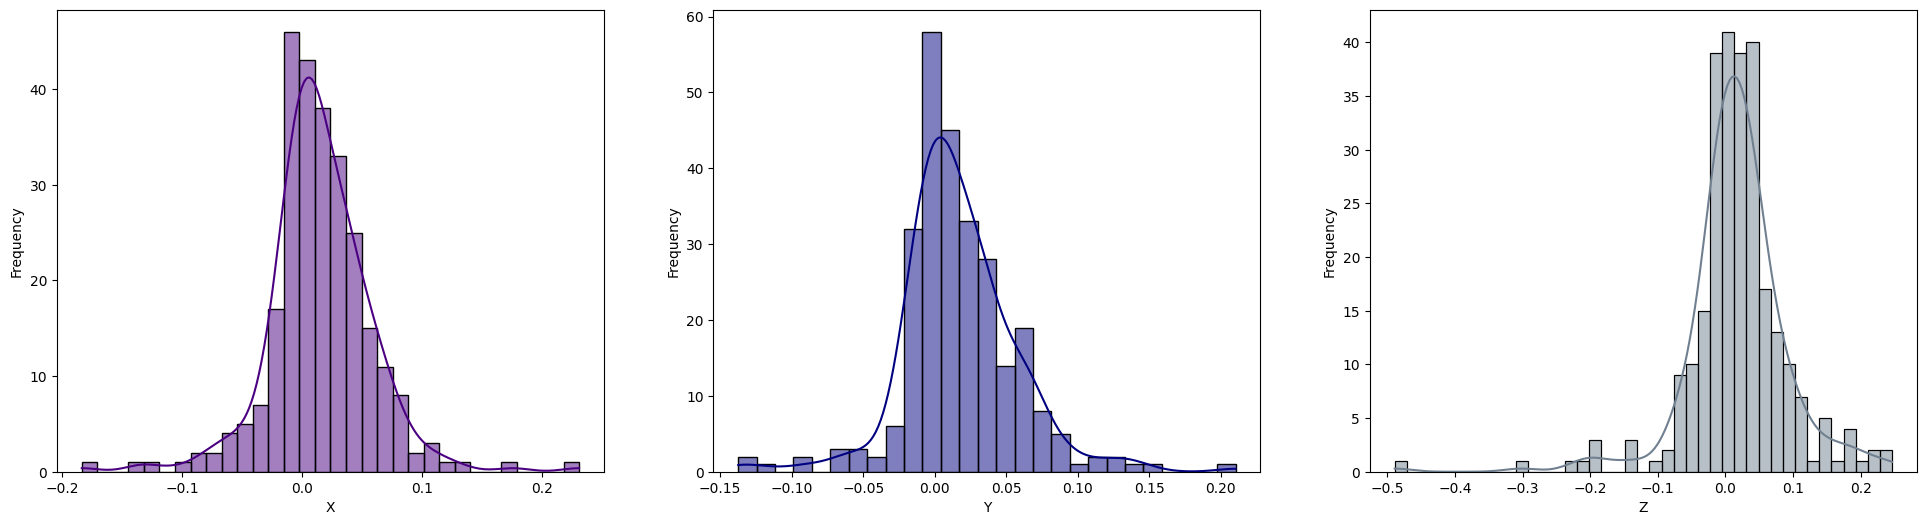

In [40]:
residual_label = "XYZ"
fig, axis = plt.subplots(1,3, figsize=(24,6))
#fig.suptitle("Residuals CIE XYZ", fontsize = 14)
colours = ["indigo", "navy", "slategrey"]
for i in range(0,len(axis)):
    sns.histplot(x=residuals[:,i], color = colours[i], kde=True, ax = axis[i])
    axis[i].set(xlabel=f"{residual_label[i]}", ylabel="Frequency")
plt.show()

/tmp/ipykernel_11826/532338591.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([y_test[:,0].min(), y_test[:,0].max()], [y_test[:,0].min(), y_test[:,0].max()], "k--", color="black", lw=2)


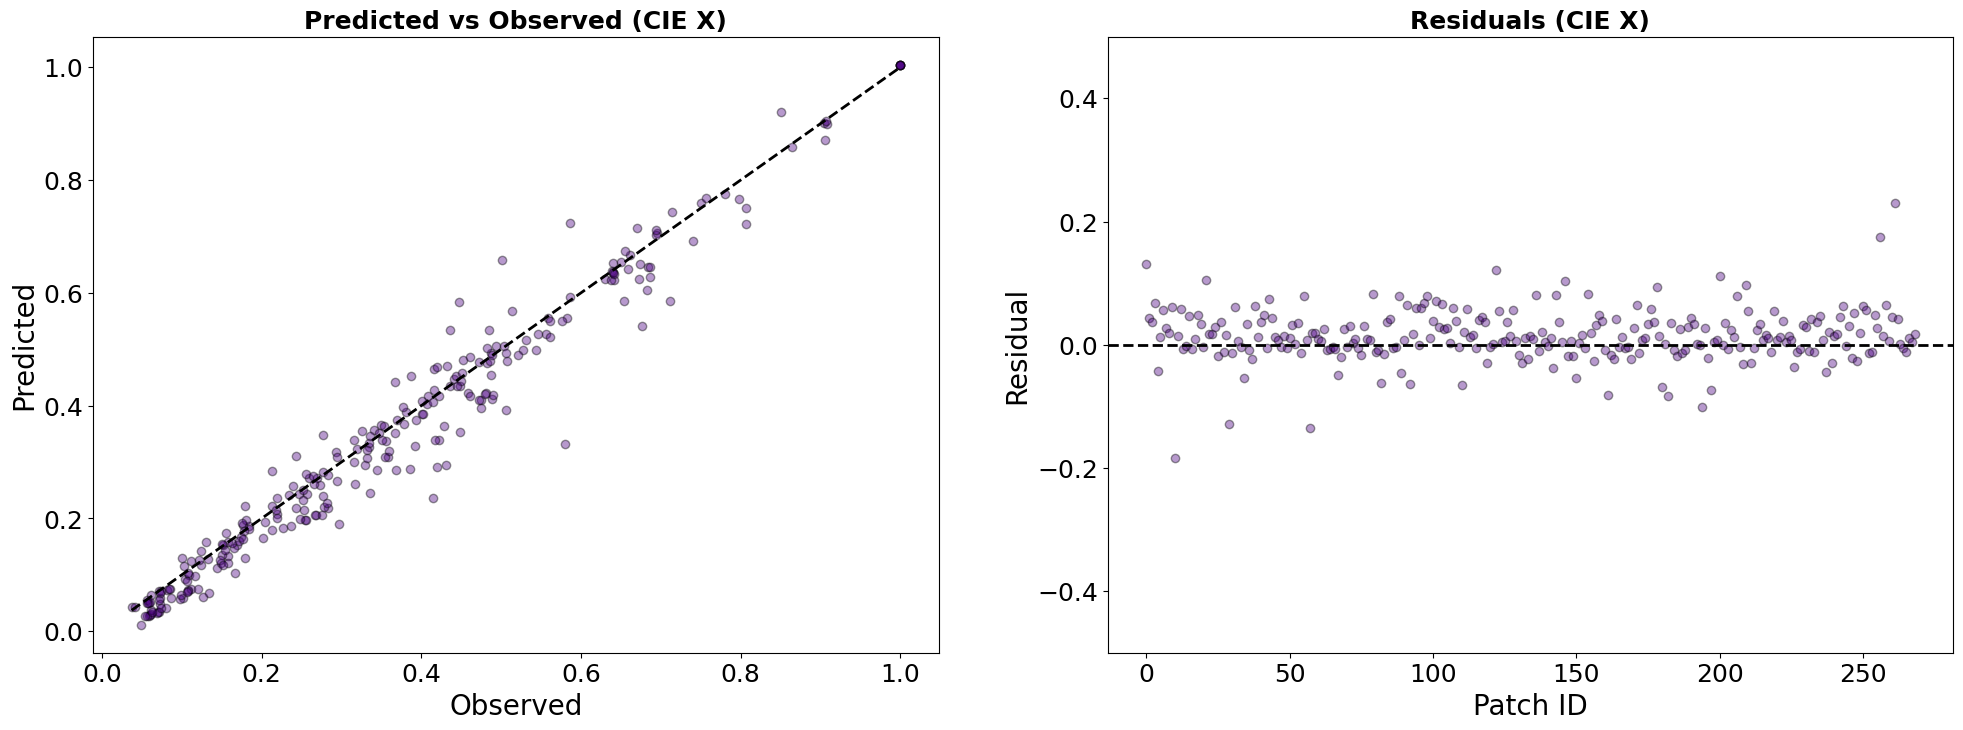

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

axes[0].scatter(y_test[:,0], y_pred[:,0], color = "indigo", edgecolors=(0,0,0), alpha=0.4)
axes[0].plot([y_test[:,0].min(), y_test[:,0].max()], [y_test[:,0].min(), y_test[:,0].max()], "k--", color="black", lw=2)
axes[0].set_title('Predicted vs Observed (CIE X)', fontsize = 18, fontweight = "bold")
axes[0].set_xlabel('Observed', fontsize = 20)
axes[0].set_ylabel('Predicted', fontsize = 20)
axes[0].tick_params(labelsize = 18)

axes[1].scatter(list(range(len(y_test[:,0]))), residuals[:,0], color ="indigo", edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_ylim(-0.5, 0.5)
axes[1].set_title('Residuals (CIE X)', fontsize = 18, fontweight = "bold")
axes[1].set_xlabel('Patch ID', fontsize = 20)
axes[1].set_ylabel('Residual', fontsize = 20)
axes[1].tick_params(labelsize = 18)

plt.show()

/tmp/ipykernel_11826/1698665368.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([y_test[:,1].min(), y_test[:,1].max()], [y_test[:,1].min(), y_test[:,1].max()], "k--", color="black", lw=2)


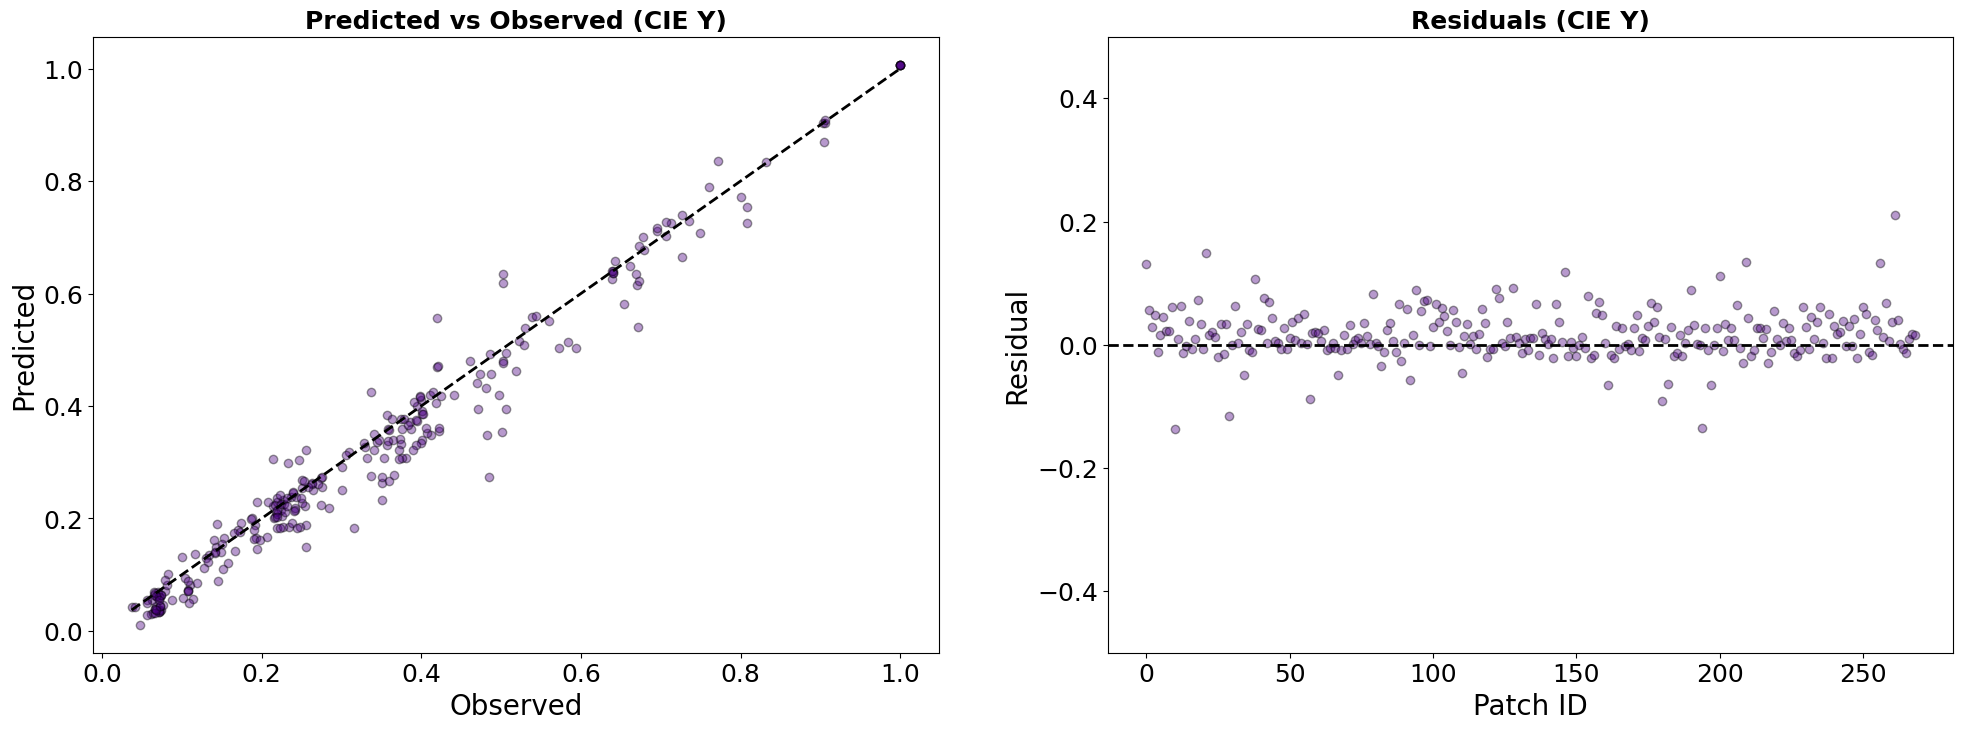

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

axes[0].scatter(y_test[:,1], y_pred[:,1], color = "indigo", edgecolors=(0,0,0), alpha=0.4)
axes[0].plot([y_test[:,1].min(), y_test[:,1].max()], [y_test[:,1].min(), y_test[:,1].max()], "k--", color="black", lw=2)
axes[0].set_title('Predicted vs Observed (CIE Y)', fontsize = 18, fontweight = "bold")
axes[0].set_xlabel('Observed', fontsize = 20)
axes[0].set_ylabel('Predicted', fontsize = 20)
axes[0].tick_params(labelsize = 18)

axes[1].scatter(list(range(len(y_test[:,1]))), residuals[:,1], color ="indigo", edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuals (CIE Y)', fontsize = 18, fontweight = "bold")
axes[1].set_ylim(-0.5, 0.5)
axes[1].set_xlabel('Patch ID', fontsize = 20)
axes[1].set_ylabel('Residual', fontsize = 20)
axes[1].tick_params(labelsize = 18)

plt.show()

/tmp/ipykernel_11826/517942484.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([y_test[:,2].min(), y_test[:,2].max()], [y_test[:,2].min(), y_test[:,2].max()], "k--", color="black", lw=2)


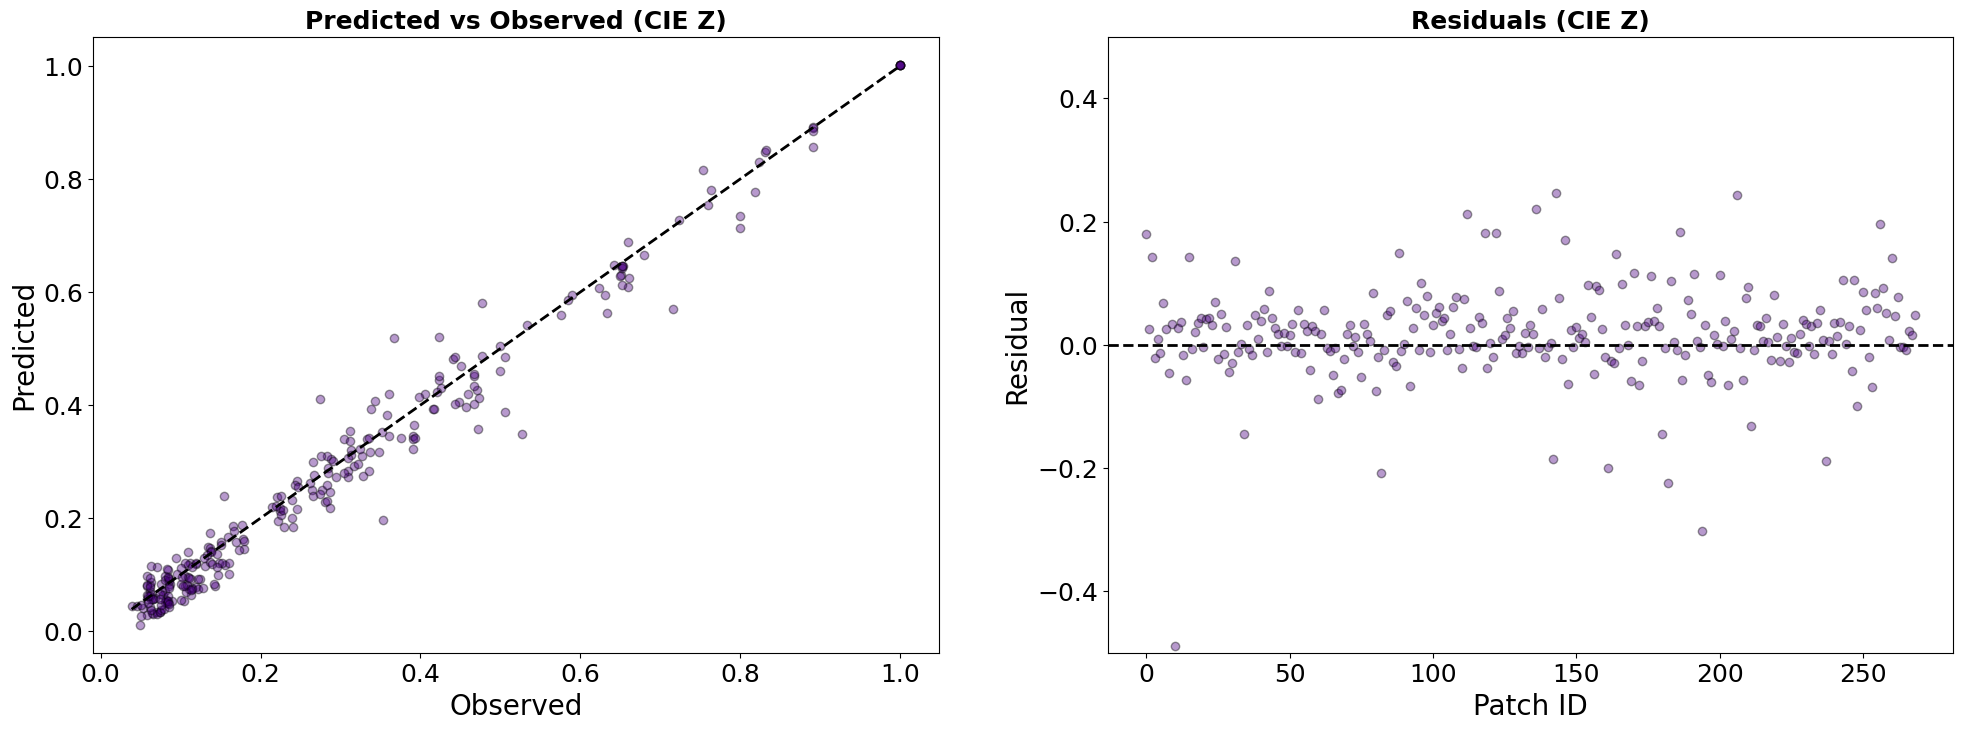

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

axes[0].scatter(y_test[:,2], y_pred[:,2], color = "indigo", edgecolors=(0,0,0), alpha=0.4)
axes[0].plot([y_test[:,2].min(), y_test[:,2].max()], [y_test[:,2].min(), y_test[:,2].max()], "k--", color="black", lw=2)
axes[0].set_title('Predicted vs Observed (CIE Z)', fontsize = 18, fontweight = "bold")
axes[0].set_xlabel('Observed', fontsize = 20)
axes[0].set_ylabel('Predicted', fontsize = 20)
axes[0].tick_params(labelsize = 18)

axes[1].scatter(list(range(len(y_test[:,2]))), residuals[:,2], color ="indigo", edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuals (CIE Z)', fontsize = 18, fontweight = "bold")
axes[1].set_ylim(-0.5, 0.5)
axes[1].set_xlabel('Patch ID', fontsize = 20)
axes[1].set_ylabel('Residual', fontsize = 20)
axes[1].tick_params(labelsize = 18)

plt.show()

$\Delta E_{ab}^*$

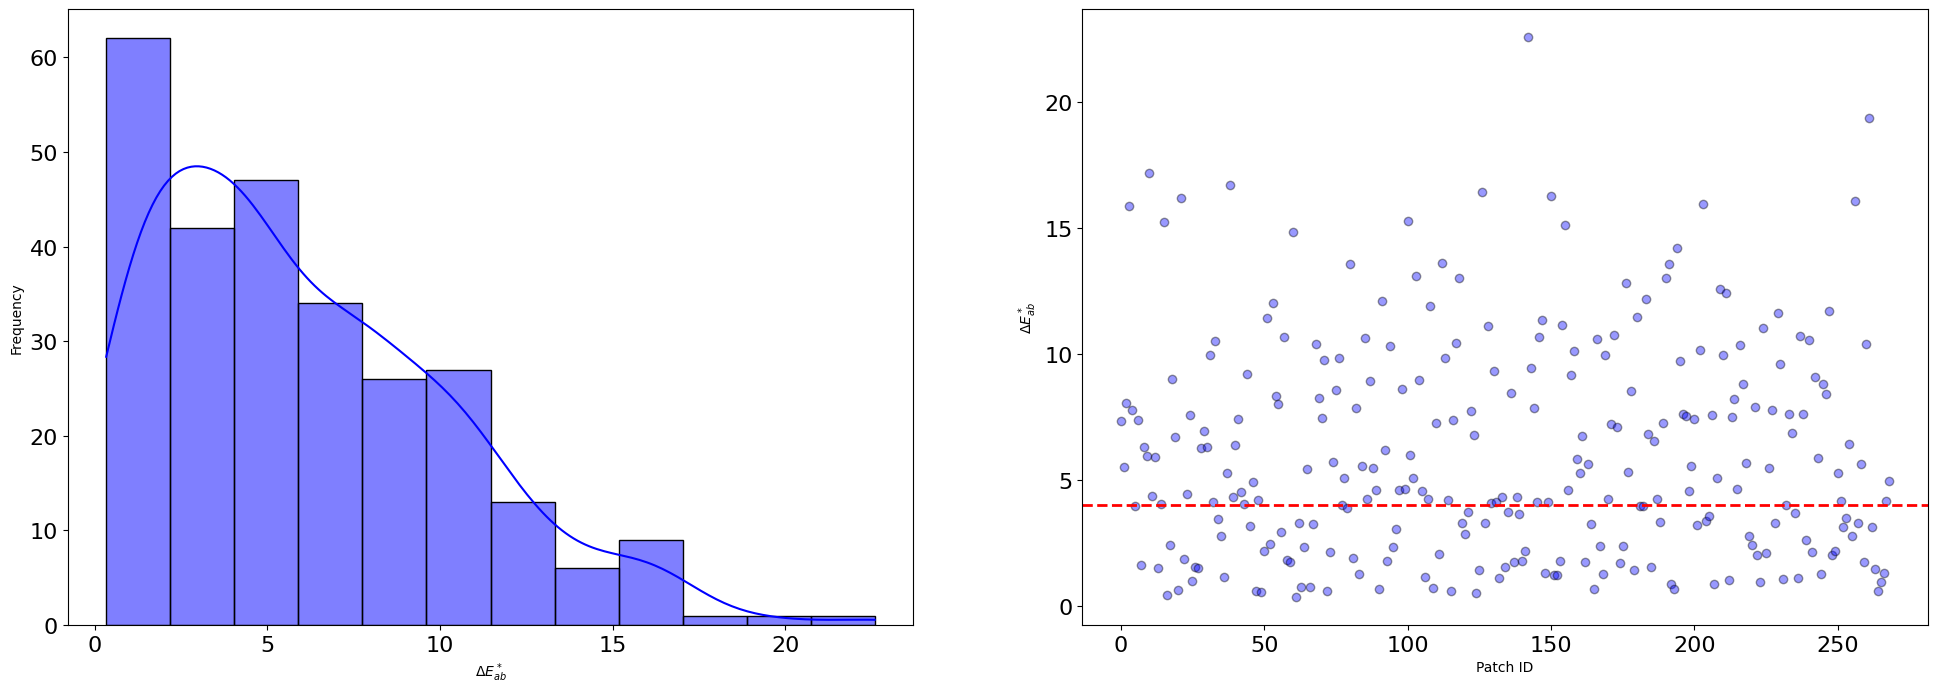

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

sns.histplot(x=AE_values, color = "blue", kde=True, ax = axes[0])
#axes[0].set_title('Colour-difference ($\Delta E_{ab}^*$)', fontsize = 10, fontweight = "bold")
axes[0].set_xlabel('$\Delta E_{ab}^*$')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(labelsize = 16)


axes[1].scatter(list(range(len(AE_values))), AE_values, color ="blue", edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 4, linestyle = '--', color = 'red', lw=2) # threshold
#axes[1].set_title('Colour Differences ($\Delta E_{ab}^*$)', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel('Patch ID')
axes[1].set_ylabel('$\Delta E_{ab}^*$')
axes[1].tick_params(labelsize = 16)

$\Delta E_{00}^*$

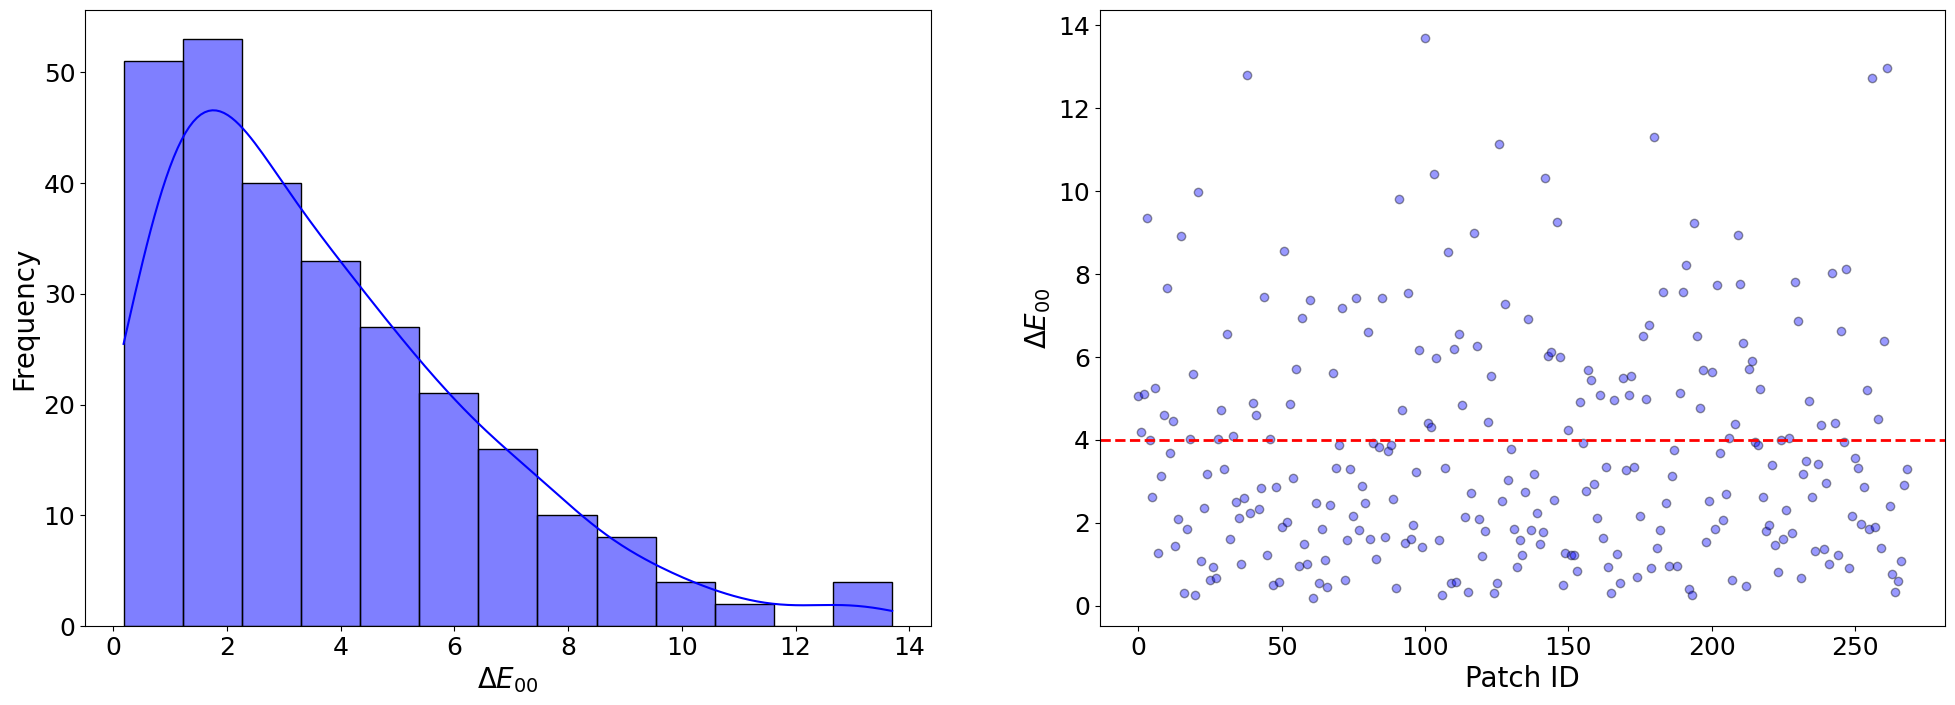

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

sns.histplot(x=CIEDE2000, color = "blue", kde=True, ax = axes[0])
#axes[0].set_title('Colour-difference ($\Delta E_{00}^*$)', fontsize = 10, fontweight = "bold")
axes[0].set_xlabel('$\Delta E_{00}$', fontsize = 20)
axes[0].set_ylabel('Frequency', fontsize = 20)
axes[0].tick_params(labelsize = 18)

axes[1].scatter(list(range(len(CIEDE2000))), CIEDE2000, color ="blue", edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 4, linestyle = '--', color = 'red', lw=2) # threshold
#axes[1].set_title('Colour-differences ($\Delta E_{00}^*$)', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel('Patch ID', fontsize = 20)
axes[1].set_ylabel('$\Delta E_{00}$', fontsize = 20)
axes[1].tick_params(labelsize = 18)